### Setup


In [1]:
import deeplake
from deeplake import Dataset
from plots import plot

ds: Dataset = deeplake.load("hub://activeloop/icdar-2013-text-localize-train")


class iArray(list):
    def map(self, *functions):
        result = self
        for func in functions:
            result = list(map(func, result))
        return iArray(result)

    def show(self, img):
        plot([img, *self])

c:\Users\johan\AppData\Local\Programs\Python\Python310\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.17) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/icdar-2013-text-localize-train



|

hub://activeloop/icdar-2013-text-localize-train loaded successfully.



### Bilateral Filters


#### Standard Bilateral Filter


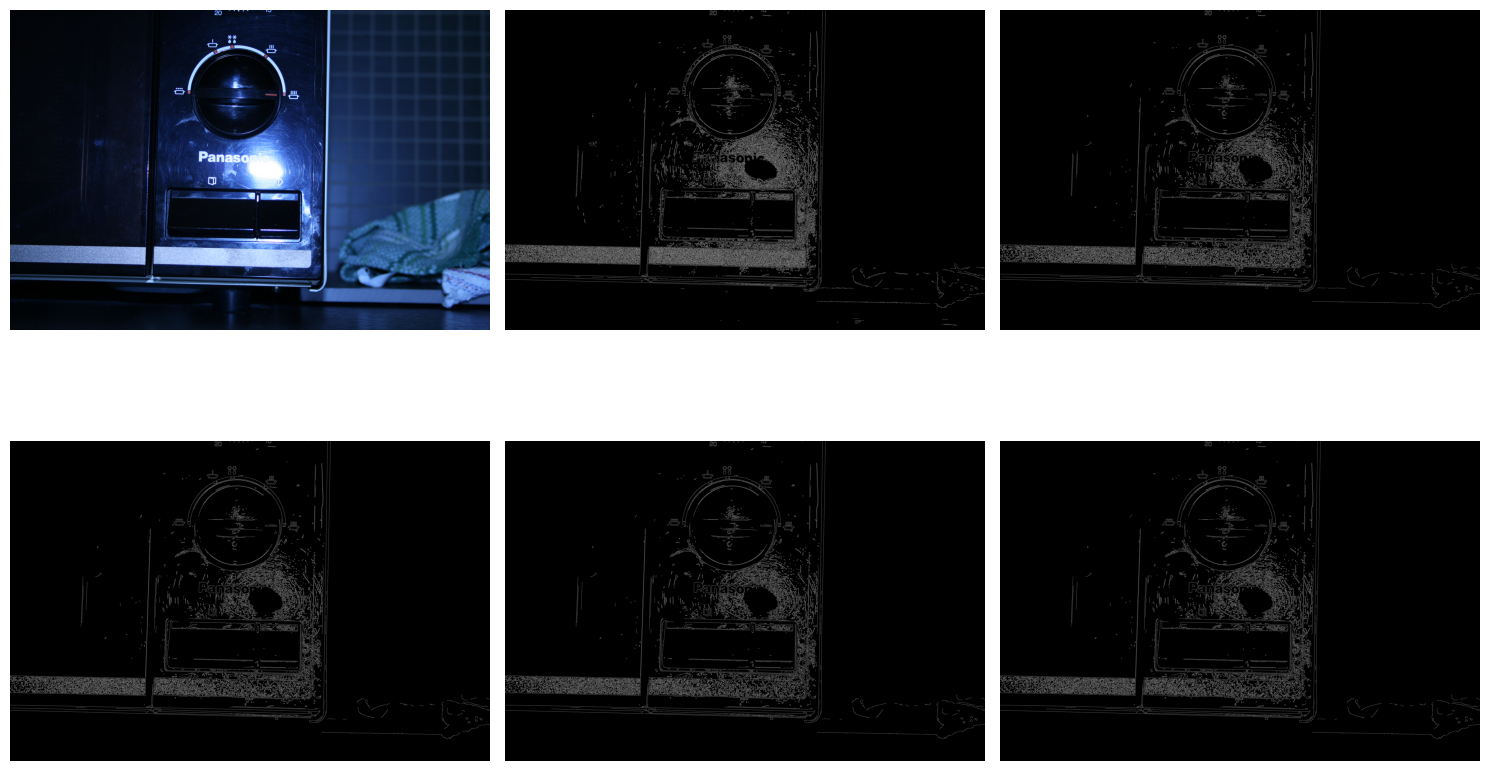

In [16]:
import cv2
from random import randint
from skimage.color import rgb2gray
from skimage.feature import canny

idx = randint(0, 230)
# idx = 79
img = rgb2gray(ds.images[idx].numpy())

iters = [cv2.bilateralFilter(img, 5, i, i) for i in range(100, 500, 100)]
imgs = iArray([img, *iters]).map(canny).show(img)

#### Bilateral Texture Filter


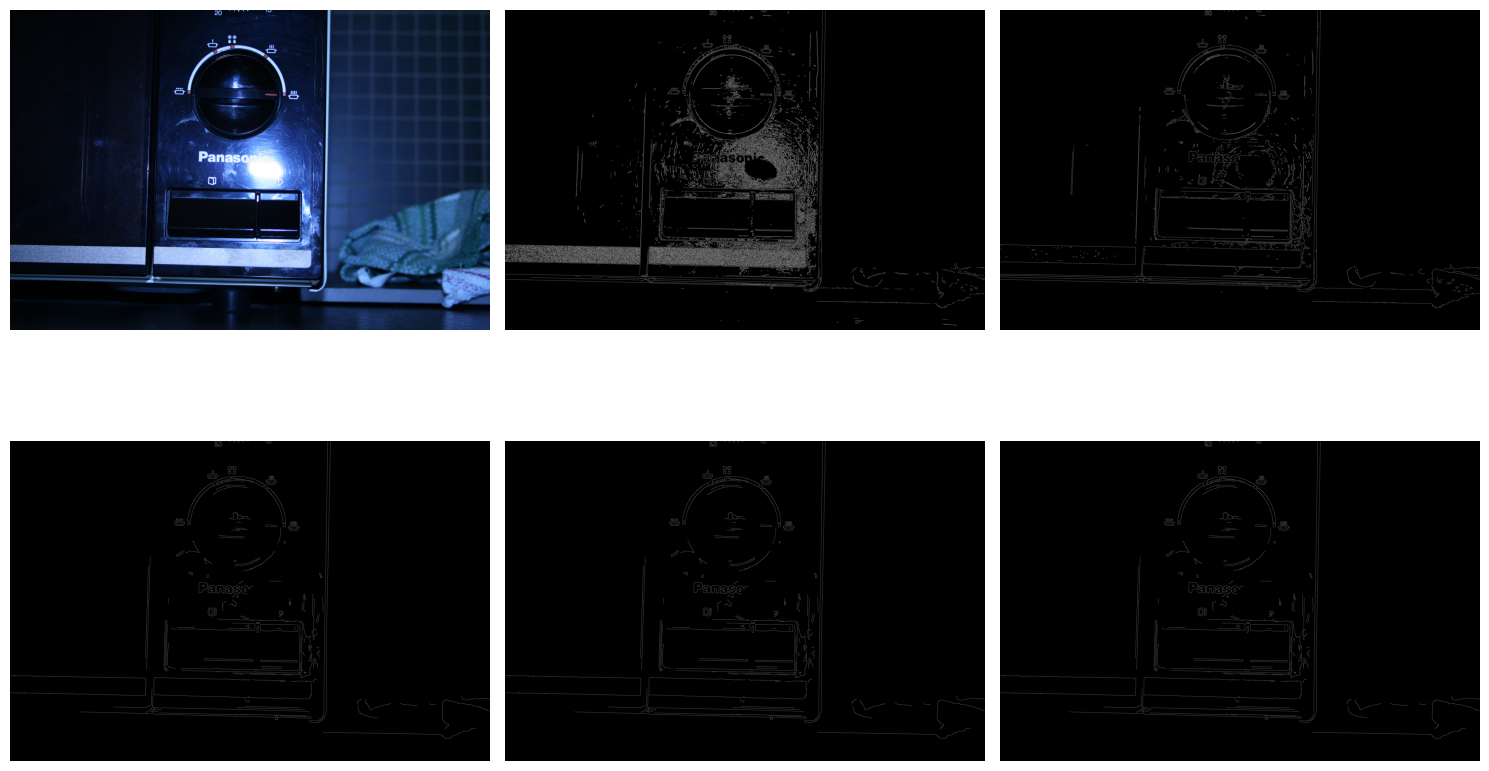

In [17]:
iters = [
    cv2.ximgproc.bilateralTextureFilter(img, sigmaAlpha=i, sigmaAvg=i)
    for i in range(-1, 600, 200)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)